# Tutorial: basics

In this notebook you will learn how to use the package for basic purposes :  
1. Load the timeseries you want to analyse  
2. Plot some of your time series  
3. Classify your timeseries  
4. Save and load back your classification results

## Imports

You first need to import the package.

In [1]:
%%time

import ISEM_Biodicee_AlexisGirot_TimeSeriesAnalysis as TSA
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


CPU times: user 6.88 s, sys: 866 ms, total: 7.75 s
Wall time: 9.2 s


## Load data

This is the trickiest part of the package to use, we are going to use functions with complicated arguments. The reason is simple: there is no single standard for saving data (be it from simulations or in-field countings), so that loading data will not always look the same !

The first think you have to do is convert your data file to [.csv](https://en.wikipedia.org/wiki/Comma-separated_values). This can be done easily in most programming languages and office softwares.

You can find a _tutorials data_ folder in the _tutorials_ folder. It contains the two .csv files we are going to use for this tutorial. These contain fictitious abundance data for _Emunctator sorbens_, a species of the [Rhinogradentia](https://en.wikipedia.org/wiki/Rhinogradentia) order. You can see two files containing the same data: _Data\_by\_col_ and _Data\_by\_row_. With them we will illustrate the two main methods for loading a csv file.

### "by_col" method

Open the file _Data\_by\_col_. It shows the data format with which we want to use the "by_col" method. The time series can be identified by one or several column names. Here we identify a time series by (Species, Region). We have to specify the time and Y value (here the year and abundance).  
It is also possible to keep some other columns that are neither the id, time or Y. This can be done using the argument _to\_keep_.

In [2]:
%%time
with open("tutorials data/Data_by_col.csv", "r") as f:
    TS_col = TSA.TS_list(data = f,
                        method = "by_col",
                        delimiter = ',',
                        cols = {"id":("Species", "Region"),
                               "time":"Year",
                               "Y":"Abundance (arb. u.)"},
                        to_keep = ("Color",))

CPU times: user 3.86 ms, sys: 409 µs, total: 4.27 ms
Wall time: 5.94 ms


### "by_row" method

Open the file _Data\_by\_row_. It shows the data format with which we want to use the "by_row" method. Each time series is represented by a row, and the different years are all represented by a column, so that we need to specify the list of years to extract.  
It is also possible to keep some other columns using the argument _to\_keep_.

In [3]:
%%time
with open("tutorials data/Data_by_row.csv", "r") as f:
    TS_row = TSA.TS_list(data = f,
                        method = "by_row",
                        delimiter = ',',
                        rows = {"id":("Species", "Region"),
                               "time":range(1,51)},
                        to_keep = ("Color",))

CPU times: user 2.7 ms, sys: 0 ns, total: 2.7 ms
Wall time: 1.91 ms


For the moment, only these two methods are available for .csv files. In our example, they are equivalent.

In [4]:
ts = TS_col
ts.name = "Emunctator sorbens" #Can also be chosen while loading the data

## Plot time series

Time series can be plotted using their id.

In [5]:
# Getting time series id
ts.time_series.keys()

dict_keys([('Emunctator sorbens', 'Pacific'), ('Emunctator sorbens', 'Atlantic')])

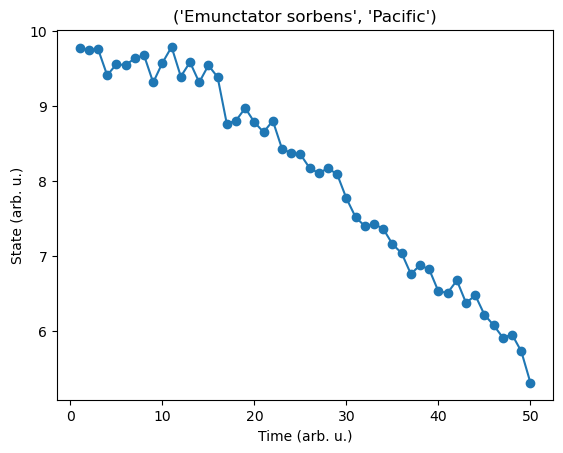

In [6]:
ts.plot(('Emunctator sorbens', 'Pacific'))
plt.show()

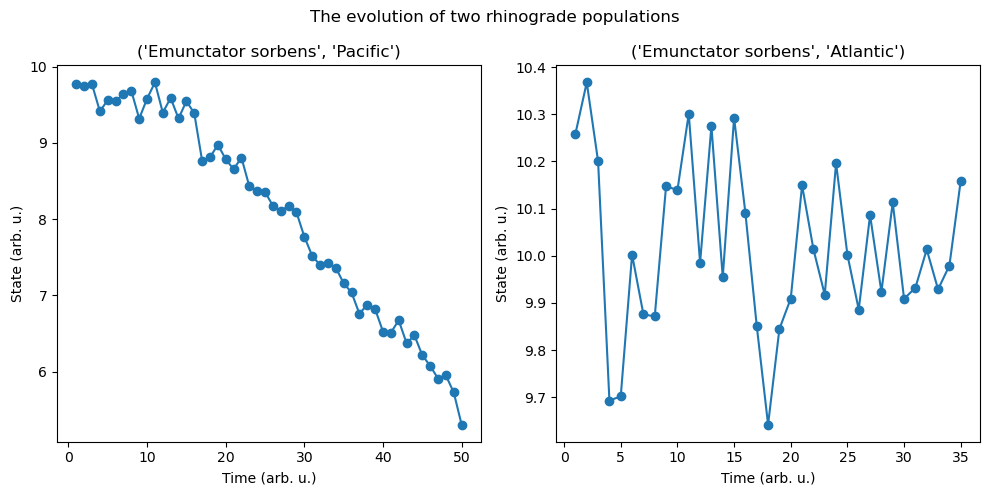

In [7]:
# TS_list.plot can take an ax as an argument for plotting mutliple time series

l_id = list(ts.time_series.keys())
fig, ax = plt.subplots(ncols = len(l_id), nrows = 1, figsize = (10,5), tight_layout = True)

for i in range(len(l_id)):
    ts.plot(time_series_id = l_id[i], ax = ax[i])

plt.suptitle("The evolution of two rhinograde populations")
plt.show()

## Classify time series

This is the longest step of the classification, you will need a lot of time to classify a big dataset (eg simulated time series).

Not all time series will be classified, only those longer than some minimum length. For the moment it is not possible to choose this miminum length, which is fixed to 20.  
You can plot a histogram of the length of your time series to check they are relevant (ie long enough) for the classification code.

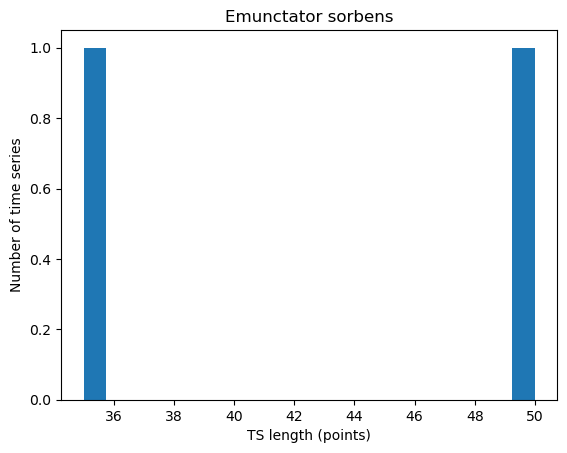

In [8]:
ts.hist()
plt.show()

The details of the classification process can be found in [Pelissie et al](https://doi.org/10.1016/j.biocon.2023.110429). You need to choose a parameter _asd\_thr_ that will be used for the validation of an abrupt trajectory, this parameter can greatly affect the proportion of infered abrupt trajectories !

In [9]:
%%time
ts.classify(asd_thr = 0.15)
pass

R[write to console]: Registered S3 method overwritten by 'MuMIn':
  method     from  
  coef.geese kyotil



CPU times: user 7 s, sys: 112 ms, total: 7.11 s
Wall time: 9.54 s


Now you can play with the classification. Note that the code returns many details about the fits and trajectories, so that you might need to explore a little bit before finding what you are looking for !  
Here are a few examples:

In [10]:
ts.classification["outlist"]["('Emunctator sorbens', 'Pacific')"]["best_traj"]["traj"]

'decrease_accelerated'

In [11]:
ts.classification["outlist"]["('Emunctator sorbens', 'Atlantic')"]["best_traj"]["traj"]

'stable_constant'

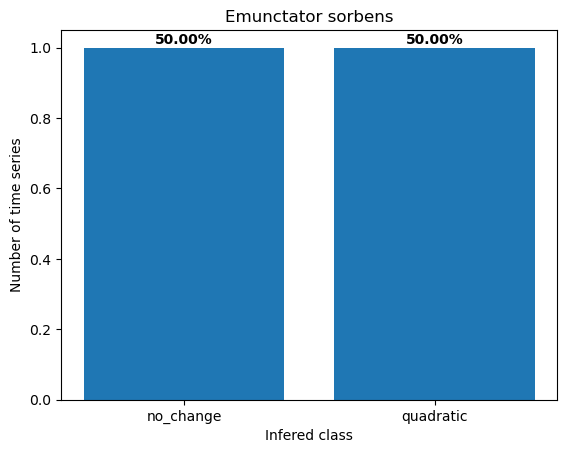

In [12]:
ts.bar_plot()
plt.show()

### Multicore classification

The classification step can be prohibitively long for large datasets. To bypass this problem, it is possible to run the classification in parallel on multiple cores. In our case this is not relevant, but here is the way to do it:

In [13]:
%%time
ts.mc_classify(asd_thr = 0.15)
pass

CPU times: user 25 ms, sys: 139 ms, total: 164 ms
Wall time: 3.01 s


## Save classification results

The package offers the possibility to store the TS_list object in a [.json](https://en.wikipedia.org/wiki/JSON) file so that it can be recovered later.

In [14]:
with open("tutorials output/Rhinogrades.json", "w") as f:
    ts.save(f, saving_name = "Classified rhinograde data") #Saving name will be the name of the list when loaded from the file

The saved TS_list object can be loaded from the file initializing a TS_list object with the link to the .json file instead of a link to a .csv file as seen earlier. In this case no extra argument is needed since the format is already adapted for the package.

In [15]:
with open("tutorials output/Rhinogrades.json", "r") as f:
    ts2 = TSA.TS_list(data = f)

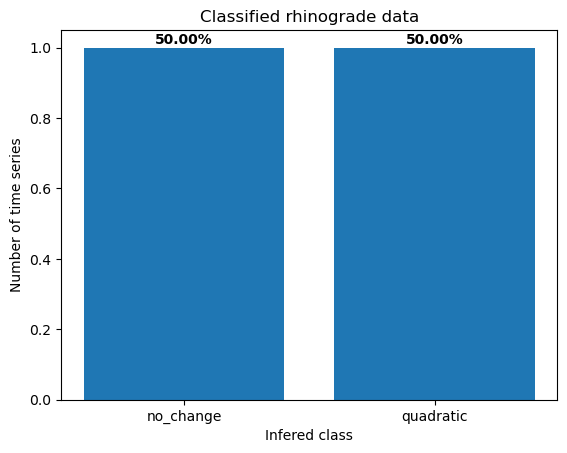

In [16]:
ts2.bar_plot()
plt.show()